In [23]:
import fastf1
from src.utils import get_lap_data
fastf1.Cache.enable_cache('./.cache')  # replace with your cache directory

In [2]:
race = 'Azerbaijan'
session = fastf1.get_session(2024, race, 'Q')
session_old_qual = fastf1.get_session(2023,race,'Q')
session_p = fastf1.get_session(2024,race,'FP3')
session.load()
session_p.load()
session_old_qual.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '10', '4', '77', '24', '31']
core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 3 [v3.6.1]
req            INFO 	Us

In [3]:
lap_prac = get_lap_data(session_p)
lap_prac.columns = [f'{col}_prac' if col not in ['Team'] else col for col in lap_prac.columns]
lap_old_qual = get_lap_data(session_old_qual)
lap_old_qual.columns = [f'{col}_old_qual' if col not in ['Team'] else col for col in lap_old_qual.columns]
lap_qual = get_lap_data(session)

/Users/rohith/Documents/Projects/F1/src/utils.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['LapTime'].idxmin()])
/Users/rohith/Documents/Projects/F1/src/utils.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['LapTime'].idxmin()])
/Users/rohith/Documents/Projects/F1/src/utils.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. Thi

In [4]:
laps = session.laps
laps = laps[(laps['IsAccurate'] == True) & (laps['Deleted'] == False) & (laps['IsPersonalBest']==True)].sort_values('LapTime').reset_index(drop=True)
laps.drop(columns=['Position','LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate','SpeedFL','SpeedST','Sector1SessionTime',
       'Sector2SessionTime','Sector3SessionTime','PitOutTime','PitInTime'],inplace=True)
# Convert all timedelta columns to seconds
for col in laps.select_dtypes(include='timedelta64[ns]').columns:
       laps[col] = laps[col].dt.total_seconds()
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,IsPersonalBest,Compound,TyreLife,FreshTyre,Team
0,4417.332,LEC,16,101.365,19.0,5.0,35.702,40.813,24.850,220.0,236.0,True,SOFT,2.0,True,Ferrari
1,3950.133,LEC,16,101.610,16.0,4.0,35.802,40.983,24.825,221.0,236.0,True,SOFT,2.0,True,Ferrari
2,4405.172,PIA,81,101.686,18.0,6.0,35.782,40.972,24.932,217.0,231.0,True,SOFT,2.0,True,McLaren
3,4412.409,SAI,55,101.805,22.0,5.0,35.716,41.181,24.908,222.0,230.0,True,SOFT,2.0,True,Ferrari
4,4448.004,PER,11,101.813,14.0,4.0,35.649,41.198,24.966,231.0,232.0,True,SOFT,2.0,True,Red Bull Racing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1024.996,OCO,31,105.665,2.0,1.0,37.633,42.815,25.217,204.0,230.0,True,SOFT,2.0,True,Alpine
95,1007.896,ZHO,24,105.864,2.0,1.0,37.661,43.031,25.172,203.0,213.0,True,SOFT,2.0,True,Kick Sauber
96,1094.434,ALO,14,121.400,2.0,1.0,37.072,56.448,27.880,219.0,78.0,True,SOFT,2.0,True,Aston Martin
97,1051.799,RUS,63,124.564,2.0,1.0,44.655,53.687,26.222,138.0,158.0,True,MEDIUM,2.0,True,Mercedes


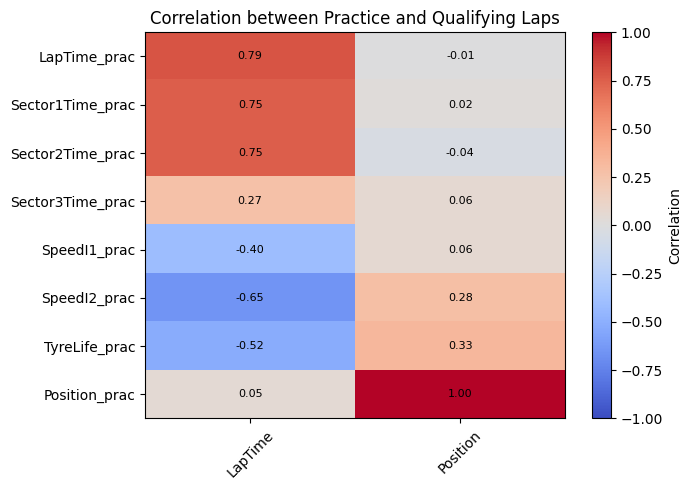

In [6]:
import matplotlib.pyplot as plt

# Select common numeric columns for correlation
numeric_cols_prac = ['LapTime_prac', 'Sector1Time_prac', 'Sector2Time_prac', 'Sector3Time_prac', 'SpeedI1_prac', 'SpeedI2_prac', 'TyreLife_prac','Position_prac']
numeric_cols_qual_old = ['LapTime_old_qual', 'Position_old_qual','Sector1Time_old_qual', 'Sector2Time_old_qual', 'Sector3Time_old_qual', 'SpeedI1_old_qual', 'SpeedI2_old_qual', 'SpeedFL_old_qual', 'SpeedST_old_qual']
numeric_cols_qual = ['LapTime', 'Position']

# Merge lap_prac and lap_qual on driver
merged_corr = lap_prac.merge(lap_qual, left_on='Driver_prac', right_on='Driver')

# Calculate correlation
corr_matrix = merged_corr[[*numeric_cols_prac, *numeric_cols_qual]].corr().loc[numeric_cols_prac, numeric_cols_qual]

# Plot heatmap
plt.figure(figsize=(7, 5))
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')
plt.xticks(range(len(numeric_cols_qual)), numeric_cols_qual, rotation=45)
plt.yticks(range(len(numeric_cols_prac)), numeric_cols_prac)
plt.title('Correlation between Practice and Qualifying Laps')
for i in range(len(numeric_cols_prac)):
    for j in range(len(numeric_cols_qual)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
plt.show()


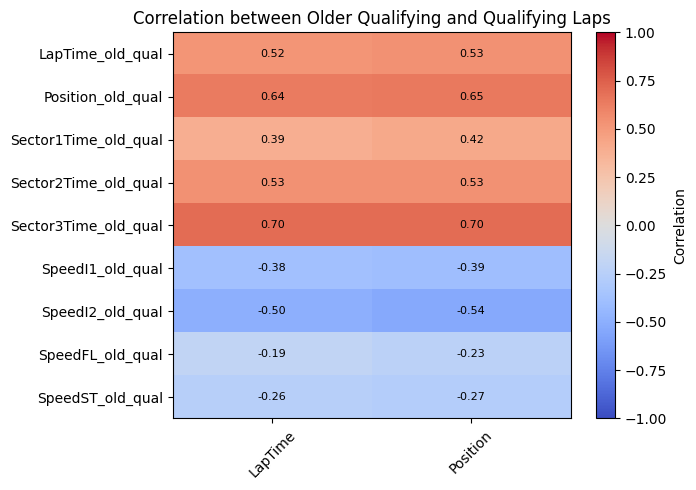

In [93]:
# Merge lap_prac and lap_qual on driver
merged_corr = lap_old_qual.merge(lap_qual, left_on='Driver_old_qual', right_on='Driver')

# Calculate correlation
corr_matrix = merged_corr[[*numeric_cols_qual_old, *numeric_cols_qual]].corr().loc[numeric_cols_qual_old, numeric_cols_qual]

# Plot heatmap
plt.figure(figsize=(7, 5))
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation')
plt.xticks(range(len(numeric_cols_qual)), numeric_cols_qual, rotation=45)
plt.yticks(range(len(numeric_cols_qual_old)), numeric_cols_qual_old)
plt.title('Correlation between Older Qualifying and Qualifying Laps')
for i in range(len(numeric_cols_qual_old)):
    for j in range(len(numeric_cols_qual)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
plt.show()

In [96]:
lap_old_qual_clean = lap_old_qual[['LapTime_old_qual', 'Position_old_qual','Sector1Time_old_qual', 'Sector2Time_old_qual', 'Sector3Time_old_qual','Driver_old_qual']]
lap_prac_clean = lap_prac[['LapTime_prac', 'Sector1Time_prac', 'Sector2Time_prac', 'Sector3Time_prac', 'SpeedI1_prac', 'SpeedI2_prac', 'TyreLife_prac','Position_prac','Driver_prac']]
final_lap = lap_qual.merge(lap_prac_clean, left_on='Driver', right_on='Driver_prac').merge(lap_old_qual_clean,left_on='Driver', right_on='Driver_old_qual').drop(columns=['Driver_prac','Driver_old_qual'])

In [98]:
final_lap.columns

Index(['Position', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Sector1Time',
       'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2',
       'SpeedFL', 'SpeedST', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'TrackStatus', 'LapTime_prac', 'Sector1Time_prac',
       'Sector2Time_prac', 'Sector3Time_prac', 'SpeedI1_prac', 'SpeedI2_prac',
       'TyreLife_prac', 'Position_prac', 'LapTime_old_qual',
       'Position_old_qual', 'Sector1Time_old_qual', 'Sector2Time_old_qual',
       'Sector3Time_old_qual'],
      dtype='object')

In [97]:
final_lap.head(2)

,Position,Driver,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,Sector3Time_prac,SpeedI1_prac,SpeedI2_prac,TyreLife_prac,Position_prac,LapTime_old_qual,Position_old_qual,Sector1Time_old_qual,Sector2Time_old_qual,Sector3Time_old_qual
0,1,LEC,101.365,19.0,5.0,35.702,40.813,24.850,4351.669,4392.482,...,24.747,217.0,239.0,5.0,2,100.203,1,35.224,40.191,24.788
1,2,PIA,101.686,18.0,6.0,35.782,40.972,24.932,4339.268,4380.240,...,24.876,217.0,236.0,2.0,4,101.611,10,35.737,40.903,24.971


In [45]:
year=2023
race = 18 #'Azerbaijan'

In [49]:
import pandas as pd
import logging 
logging.getLogger('fastf1').setLevel(logging.ERROR)  # This will disable both logs and warnings
team_driver_performance = pd.read_csv('.cache/hist_data/team_driver_performance.csv')

In [ ]:
prac_columns = ['DriverNumber_prac','LapTime_prac', 'Sector1Time_prac', 'Sector2Time_prac', 'Sector3Time_prac', 'SpeedI1_prac', 'SpeedI2_prac', 'TyreLife_prac','Position_prac','Driver_prac']
old_qual_columns = ['LapTime_old_qual', 'Position_old_qual','Sector1Time_old_qual', 'Sector2Time_old_qual', 'Sector3Time_old_qual','Driver_old_qual']

try:
    session = fastf1.get_session(year, race, 'Q')
    session.load()
    lap_qual = get_lap_data(session)
except Exception as e:
    print(f"Error loading qualifying session for {race} in {year}: {e}")

try:
    session_old_qual = fastf1.get_session(year-1,race,'Q')
    session_old_qual.load()
    lap_old_qual = get_lap_data(session_old_qual)
    lap_old_qual.columns = [f'{col}_old_qual' if col not in ['Team'] else col for col in lap_old_qual.columns]
except Exception as e:
    print(f"Error loading old qualifying session for {race} in {year-1}: {e}")
    lap_old_qual = pd.DataFrame([[-1]*len(old_qual_columns)]*20,columns=old_qual_columns)  # Empty DataFrame if old qualifying session fails
    lap_old_qual['Driver_old_qual'] = lap_qual['Driver']
    no_qual = True

try:
    session_p = fastf1.get_session(year,race,'FP3')
    session_p.load()
    lap_prac = get_lap_data(session_p)
    lap_prac.columns = [f'{col}_prac' if col not in ['Team'] else col for col in lap_prac.columns]
except Exception as e:
    print(f"Error loading practice session for {race} in {year}: {e}")
    lap_prac = pd.DataFrame([[-1]*len(prac_columns)]*20,columns=prac_columns)  # Empty DataFrame if practice session fails
    lap_prac['DriverNumber_prac'] = lap_qual['DriverNumber']
    lap_prac['Driver_prac'] = lap_qual['Driver']
    no_prac = True

if no_prac and no_qual:
    return None, None, None
else:
    lap_old_qual_clean = lap_old_qual[old_qual_columns]
    lap_prac_clean = lap_prac[prac_columns]

    final_lap = (
        lap_prac_clean
        .merge(lap_old_qual_clean, left_on='Driver_prac', right_on='Driver_old_qual')
        .merge(
            team_driver_performance[team_driver_performance['Country'] == race],
            left_on='Driver_prac', right_on='Name'
        )
        .drop(columns=['Driver_prac', 'Driver_old_qual','Name'])
        .set_index('DriverNumber_prac')
    )

    y = lap_qual[['LapTime', 'Position', 'DriverNumber']].set_index('DriverNumber').loc[final_lap.index]

    y_laptime = y.pop('LapTime').to_list()
    y_position = y.pop('Position').to_list()
    X = final_lap.values
    return X, y_laptime, y_position

/Users/rohith/Documents/Projects/F1/src/utils.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['LapTime'].idxmin()])


Error loading practice session for 18 in 2023: Session type 'FP3' does not exist for this event


/Users/rohith/Documents/Projects/F1/src/utils.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['LapTime'].idxmin()])


In [60]:
lap = session.laps
lap_prac = lap[(lap['IsAccurate']==True) & (lap['IsPersonalBest']==True)]
lap_prac = lap_prac.groupby('Driver').apply(
        lambda x: x[x['LapTime'] == x['LapTime'].min()]).sort_values('LapTime').reset_index(drop=True)[['Driver','Team']]
for col in lap_prac.select_dtypes(include='timedelta64[ns]').columns:
    lap_prac[col] = lap_prac[col].dt.total_seconds()

/var/folders/5_/4d1h81wd35z18x9hd4z8h4b00000gn/T/ipykernel_15915/1303332817.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lap_prac = lap_prac.groupby('Driver').apply(


In [67]:
session.event.EventName

'United States Grand Prix'

In [57]:
team_driver_performance

,Name,Avg_Position_Past,Best_Position_Past,Worst_Position_Past,Best_Position_Recent,Worst_Position_Recent,Avg_Position_Recent,Last_Position,Avg_Finish_in_this_circuit,Avg_Team_Finish_in_this_circuit,Country,Team
0,NOR,5.746988,1,19,1,7,2.6875,-1,1.000000,-1.00,United Arab Emirates,7
1,NOR,5.746988,1,19,1,7,2.6875,-1,2.333333,-1.00,Brazil,7
2,NOR,5.746988,1,19,1,7,2.6875,-1,2.500000,-1.00,Hungary,7
3,NOR,5.746988,1,19,1,7,2.6875,-1,3.000000,-1.00,China,7
4,NOR,5.746988,1,19,1,7,2.6875,-1,3.000000,-1.00,Netherlands,7
...,...,...,...,...,...,...,...,...,...,...,...,...
418,COL,16.263158,9,20,12,20,16.7000,-1,19.000000,11.25,Qatar,3
419,COL,16.263158,9,20,12,20,16.7000,-1,19.000000,11.25,United Arab Emirates,3
420,COL,16.263158,9,20,12,20,16.7000,-1,19.000000,11.25,Spain,3
421,COL,16.263158,9,20,12,20,16.7000,-1,20.000000,11.25,Monaco,3


In [55]:
lap_prac_clean.merge(lap_old_qual_clean, left_on='Driver_prac', right_on='Driver_old_qual')

,DriverNumber_prac,LapTime_prac,Sector1Time_prac,Sector2Time_prac,Sector3Time_prac,SpeedI1_prac,SpeedI2_prac,TyreLife_prac,Position_prac,Driver_prac,LapTime_old_qual,Position_old_qual,Sector1Time_old_qual,Sector2Time_old_qual,Sector3Time_old_qual,Driver_old_qual
0,16,-1,-1,-1,-1,-1,-1,-1,-1,LEC,89.314,7,31.149,40.166,17.999,LEC
1,4,-1,-1,-1,-1,-1,-1,-1,-1,NOR,90.473,10,31.427,41.017,18.029,NOR
2,44,-1,-1,-1,-1,-1,-1,-1,-1,HAM,90.261,5,31.321,40.766,18.174,HAM
3,55,-1,-1,-1,-1,-1,-1,-1,-1,SAI,89.361,15,31.127,40.275,17.959,SAI
4,1,-1,-1,-1,-1,-1,-1,-1,-1,VER,89.304,18,31.116,40.406,17.782,VER
5,63,-1,-1,-1,-1,-1,-1,-1,-1,RUS,90.389,14,31.474,40.730,18.185,RUS
6,10,-1,-1,-1,-1,-1,-1,-1,-1,GAS,91.322,4,31.898,41.228,18.196,GAS
7,31,-1,-1,-1,-1,-1,-1,-1,-1,OCO,90.165,11,31.333,40.786,18.046,OCO
8,11,-1,-1,-1,-1,-1,-1,-1,-1,PER,89.709,12,31.373,40.433,17.903,PER
9,22,-1,-1,-1,-1,-1,-1,-1,-1,TSU,90.808,17,31.787,40.879,18.142,TSU


In [54]:
lap_old_qual_clean

,LapTime_old_qual,Position_old_qual,Sector1Time_old_qual,Sector2Time_old_qual,Sector3Time_old_qual,Driver_old_qual
0,89.304,18,31.116,40.406,17.782,VER
1,89.314,7,31.149,40.166,17.999,LEC
2,89.361,15,31.127,40.275,17.959,SAI
3,89.709,12,31.373,40.433,17.903,PER
4,90.165,11,31.333,40.786,18.046,OCO
5,90.261,5,31.321,40.766,18.174,HAM
6,90.322,2,31.455,40.707,18.160,ALO
7,90.389,14,31.474,40.730,18.185,RUS
8,90.473,10,31.427,41.017,18.029,NOR
9,90.554,19,31.655,40.741,18.158,VET


In [53]:
lap_prac_clean

,DriverNumber_prac,LapTime_prac,Sector1Time_prac,Sector2Time_prac,Sector3Time_prac,SpeedI1_prac,SpeedI2_prac,TyreLife_prac,Position_prac,Driver_prac
0,16,-1,-1,-1,-1,-1,-1,-1,-1,LEC
1,4,-1,-1,-1,-1,-1,-1,-1,-1,NOR
2,44,-1,-1,-1,-1,-1,-1,-1,-1,HAM
3,55,-1,-1,-1,-1,-1,-1,-1,-1,SAI
4,1,-1,-1,-1,-1,-1,-1,-1,-1,VER
5,63,-1,-1,-1,-1,-1,-1,-1,-1,RUS
6,10,-1,-1,-1,-1,-1,-1,-1,-1,GAS
7,31,-1,-1,-1,-1,-1,-1,-1,-1,OCO
8,11,-1,-1,-1,-1,-1,-1,-1,-1,PER
9,81,-1,-1,-1,-1,-1,-1,-1,-1,PIA


In [5]:
!pwd

/Users/rohith/Documents/Projects/F1


In [6]:
import os
from src.utils import team_driver_performance

In [20]:
session_old_qual = fastf1.get_session(year-1,race,'Q')
session_p = fastf1.get_session(year,race,'FP3')

session_p.load()
session_old_qual.load()

lap_prac = get_lap_data(session_p)
lap_prac.columns = [f'{col}_prac' if col not in ['Team'] else col for col in lap_prac.columns]
lap_old_qual = get_lap_data(session_old_qual)
lap_old_qual.columns = [f'{col}_old_qual' if col not in ['Team'] else col for col in lap_old_qual.columns]

lap_old_qual_clean = lap_old_qual[['LapTime_old_qual', 'Position_old_qual','Sector1Time_old_qual', 'Sector2Time_old_qual', 'Sector3Time_old_qual','Driver_old_qual']]
lap_prac_clean = lap_prac[['DriverNumber_prac','LapTime_prac', 'Sector1Time_prac', 'Sector2Time_prac', 'Sector3Time_prac', 'SpeedI1_prac', 'SpeedI2_prac', 'TyreLife_prac','Position_prac','Driver_prac']]

final_lap = (
    lap_prac_clean
    .merge(lap_old_qual_clean, left_on='Driver_prac', right_on='Driver_old_qual')
    .merge(
        team_driver_performance[team_driver_performance['Country'] == race],
        left_on='Driver_old_qual', right_on='Name'
    )
    .drop(columns=['Driver_prac', 'Driver_old_qual'])
    .set_index('DriverNumber_prac')
)

X = final_lap.fillna(-1).values

core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 3 [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading d